In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Load Philadelphia County Census Block Group shapefile
data_path = '/Users/wooyongjung/WJ_Projects/homeless_sf_2024/data/tl_2021_06_bg/tl_2021_06_bg.shp'
census_bg = gpd.read_file(data_path)
census_bg = census_bg.to_crs(epsg=7132)
census_bg = census_bg[census_bg['GEOID'].str.startswith('06075')]
census_bg = census_bg[['GEOID', 'geometry']]


In [14]:
census_bg.reset_index(drop=True, inplace=True)
census_bg.head()

,GEOID,geometry
0,060750210004,"POLYGON ((164771.846 78249.601, 165089.898 782..."
1,060750209003,"POLYGON ((166006.279 78928.030, 166171.951 789..."
2,060750210001,"POLYGON ((164595.731 80576.835, 164757.910 805..."
3,060750210003,"POLYGON ((164679.025 79415.225, 164845.832 794..."
4,060750211001,"POLYGON ((163227.793 81058.981, 163870.487 811..."


In [20]:
census_bg['geometry'][[0]]

0    POLYGON ((164771.846 78249.601, 165089.898 782...
Name: geometry, dtype: geometry

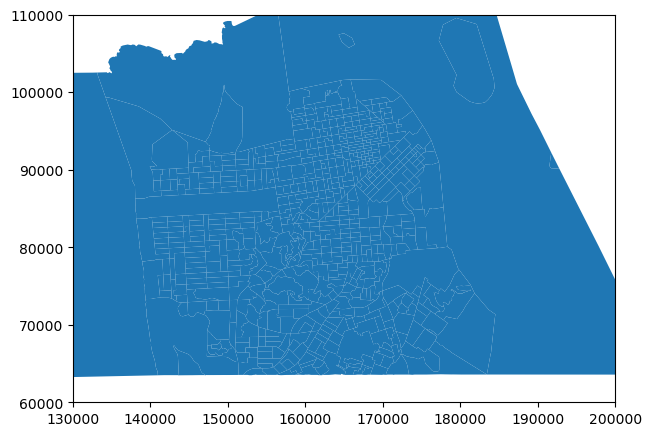

In [42]:
census_bg.plot(figsize=(7, 7))
plt.xlim(130000, 200000)
plt.ylim(60000, 110000)
plt.show()

In [23]:
# Load bbox dataset
df_bbox = pd.read_csv('data/df_bbox_99.csv')

In [24]:
df_bbox.head()

,Unnamed: 0,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,0,0,0,"(37.70474400011192, -122.51192999999927, 37.70...","(37.70546547082899, -122.51101240551692)",37.705465,-122.511012,60819901000
1,1,0,1,"(37.7047364289389, -122.51010434073075, 37.706...","(37.70545788532596, -122.50918672880256)",37.705458,-122.509187,60819901000
2,2,0,2,"(37.70472882950024, -122.508278682147, 37.7061...","(37.705450271556565, -122.50736105277427)",37.705450,-122.507361,60819901000
3,3,0,3,"(37.704721201795955, -122.50645302425056, 37.7...","(37.705442629520846, -122.50553537743458)",37.705443,-122.505535,60816009002
4,4,0,4,"(37.70471354582612, -122.50462736704401, 37.70...","(37.705434959218834, -122.5037097027861)",37.705435,-122.503710,60816009002


In [30]:
# Load bbox dataset
df_bbox = pd.read_csv('data/df_bbox_99.csv')

# Select the rows with GEOID starting with 06075 (San Francisci County)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)

# Add 0 to the beginning of GEOID
df_bbox['GEOID'] = df_bbox['GEOID'].apply(lambda x: x.zfill(12))
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('06075')]

# Reset index
df_bbox.reset_index(inplace=True, drop=True)

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

In [31]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,2,0,"(37.70764501104698, -122.5119109755011, 37.709...","(37.70836648101098, -122.51099334475741)",37.708366,-122.510993,060759901000
1,2,1,"(37.70763743908666, -122.51008524507708, 37.70...","(37.70835889471916, -122.50916759688505)",37.708359,-122.509168,060759901000
2,2,2,"(37.70762983885778, -122.50825951533793, 37.70...","(37.70835128015806, -122.50734184969886)",37.708351,-122.507342,060759901000
3,2,3,"(37.70762221036033, -122.50643378628618, 37.70...","(37.70834363732769, -122.50551610320136)",37.708344,-122.505516,060750604002
4,2,4,"(37.707614553594375, -122.5046080579244, 37.70...","(37.708335966228084, -122.50369035739516)",37.708336,-122.503690,060750604002


In [32]:
df_bbox.shape

(7439, 7)

In [33]:
df_bbox['swne_edges'] = df_bbox['swne_edges'].apply(lambda x: x[1:-1].split(','))

In [34]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,2,0,"[37.70764501104698, -122.5119109755011, 37.7...","(37.70836648101098, -122.51099334475741)",37.708366,-122.510993,060759901000
1,2,1,"[37.70763743908666, -122.51008524507708, 37....","(37.70835889471916, -122.50916759688505)",37.708359,-122.509168,060759901000
2,2,2,"[37.70762983885778, -122.50825951533793, 37....","(37.70835128015806, -122.50734184969886)",37.708351,-122.507342,060759901000
3,2,3,"[37.70762221036033, -122.50643378628618, 37....","(37.70834363732769, -122.50551610320136)",37.708344,-122.505516,060750604002
4,2,4,"[37.707614553594375, -122.5046080579244, 37....","(37.708335966228084, -122.50369035739516)",37.708336,-122.503690,060750604002


In [35]:
# Create coordinates
coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [36]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords
0,2,0,"[37.70764501104698, -122.5119109755011, 37.7...","(37.70836648101098, -122.51099334475741)",37.708366,-122.510993,060759901000,"[( -122.5119109755011, 37.70764501104698), ( -..."
1,2,1,"[37.70763743908666, -122.51008524507708, 37....","(37.70835889471916, -122.50916759688505)",37.708359,-122.509168,060759901000,"[( -122.51008524507708, 37.70763743908666), ( ..."
2,2,2,"[37.70762983885778, -122.50825951533793, 37....","(37.70835128015806, -122.50734184969886)",37.708351,-122.507342,060759901000,"[( -122.50825951533793, 37.70762983885778), ( ..."
3,2,3,"[37.70762221036033, -122.50643378628618, 37....","(37.70834363732769, -122.50551610320136)",37.708344,-122.505516,060750604002,"[( -122.50643378628618, 37.70762221036033), ( ..."
4,2,4,"[37.707614553594375, -122.5046080579244, 37....","(37.708335966228084, -122.50369035739516)",37.708336,-122.503690,060750604002,"[( -122.5046080579244, 37.707614553594375), ( ..."


In [37]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
# Apply Polygon to coords
df_bbox['geometry'] = df_bbox['coords'].apply(Polygon)

In [38]:
# Convert geometry to GeoDataFrame
df_bbox = gpd.GeoDataFrame(df_bbox, geometry=df_bbox['geometry'], crs=4326)

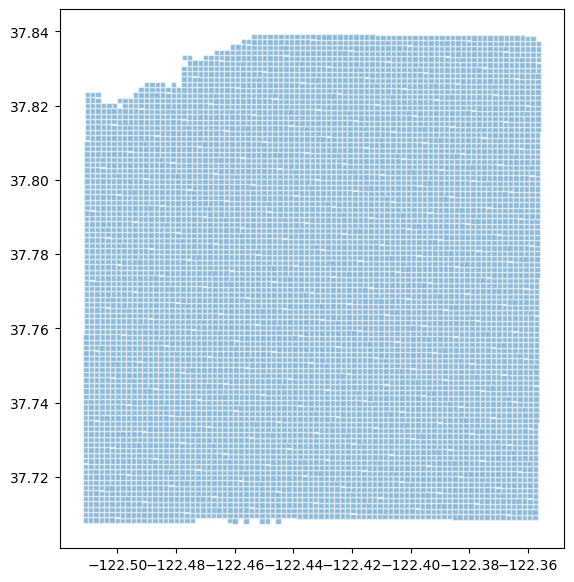

In [39]:
ax = df_bbox.plot(figsize=(7, 7), alpha=0.5, edgecolor='white')
plt.show()

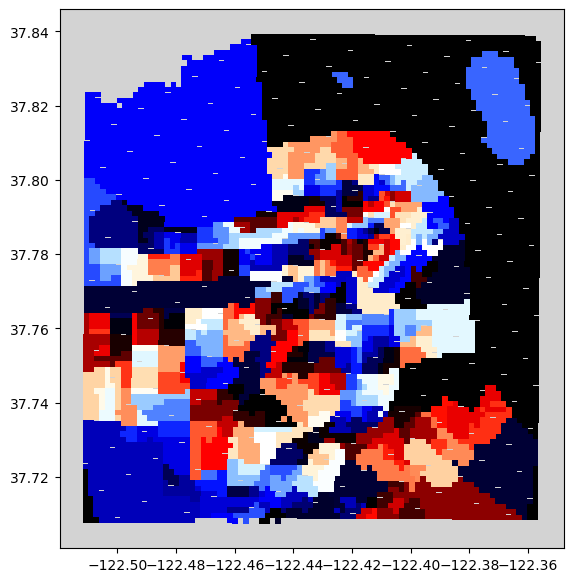

In [40]:
ax = df_bbox.plot(figsize=(7, 7), column='GEOID', cmap='flag')
ax.set_facecolor('lightgray')
plt.show()

In [44]:
df_bbox.tail()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,coords,geometry
7434,92,79,"[37.83750052343742, -122.36656787193289, 37....","(37.83822081978014, -122.36564722073818)",37.838221,-122.365647,060759902000,"[( -122.36656787193289, 37.83750052343742), ( ...","POLYGON ((-122.36657 37.83750, -122.36473 37.8..."
7435,92,80,"[37.83749067241297, -122.36473899131572, 37....","(37.838210954300514, -122.36381832266366)",37.838211,-122.363818,060759902000,"[( -122.36473899131572, 37.83749067241297), ( ...","POLYGON ((-122.36474 37.83749, -122.36290 37.8..."
7436,92,81,"[37.83748079299042, -122.36291011159109, 37....","(37.838201060422065, -122.36198942548303)",37.838201,-122.361989,060759902000,"[( -122.36291011159109, 37.83748079299042), ( ...","POLYGON ((-122.36291 37.83748, -122.36107 37.8..."
7437,92,82,"[37.837470885169836, -122.36108123276159, 37...","(37.83819113814487, -122.3601605291988)",37.838191,-122.360161,060759902000,"[( -122.36108123276159, 37.837470885169836), (...","POLYGON ((-122.36108 37.83747, -122.35924 37.8..."
7438,92,83,"[37.83746094895124, -122.35925235482976, 37....","(37.83818118746894, -122.35833163381359)",37.838181,-122.358332,060759902000,"[( -122.35925235482976, 37.83746094895124), ( ...","POLYGON ((-122.35925 37.83746, -122.35741 37.8..."


In [45]:
census_bg.head()

,GEOID,geometry
0,060750210004,"POLYGON ((164771.846 78249.601, 165089.898 782..."
1,060750209003,"POLYGON ((166006.279 78928.030, 166171.951 789..."
2,060750210001,"POLYGON ((164595.731 80576.835, 164757.910 805..."
3,060750210003,"POLYGON ((164679.025 79415.225, 164845.832 794..."
4,060750211001,"POLYGON ((163227.793 81058.981, 163870.487 811..."


In [46]:
census_bg.shape

(681, 2)

In [47]:
df_bbox['GEOID'].nunique()

671

In [48]:
df_bbox.shape

(7439, 9)

In [49]:
# Save df_bbox
df_bbox.to_csv('data/df_bbox.csv')